In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, auc, precision_recall_curve

In [21]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [22]:
file = "./DEA_results_OU.tsv"
df_dea = pd.read_csv(file, sep="\t")
df_dea = df_dea.sort_values(by='gene')
df_dea.reset_index()

,index,gene,log2FC,p_value,q_value,signif
0,42,1,1.218187,2.225380e-05,5.175303e-05,True
1,29,2,1.396444,2.572719e-07,8.575729e-07,True
2,73,3,0.668769,1.652312e-02,2.232853e-02,True
3,43,4,1.396736,2.782928e-05,6.324837e-05,True
4,26,5,1.727599,1.155357e-07,4.279102e-07,True
5,79,6,0.578102,7.608645e-02,9.393389e-02,False
6,27,7,1.177535,1.751614e-07,6.255765e-07,True
7,98,8,0.130322,2.806047e-01,3.152861e-01,False
8,95,9,0.048654,7.264215e-01,7.566891e-01,False
9,22,10,1.429573,8.443737e-08,3.671190e-07,True


In [23]:
file = "./DEA_results_BM.tsv"
df_dea_BM = pd.read_csv(file, sep="\t")
df_dea_BM = df_dea_BM.sort_values(by='gene')
df_dea_BM.reset_index()

,index,gene,log2FC,p_value,q_value,signif
0,21,1,0.639172,4.583718e-03,1.065981e-02,True
1,50,2,0.138046,9.480978e-01,9.597644e-01,False
2,25,3,0.614026,1.861205e-02,3.511708e-02,True
3,58,4,-0.195675,4.830492e-01,5.750586e-01,False
4,70,5,-0.418325,3.274953e-02,5.550768e-02,False
5,95,6,-1.382283,2.686968e-06,1.791312e-05,True
6,71,7,-0.797344,2.710512e-02,4.755284e-02,True
7,3,8,1.800040,5.500859e-12,1.375215e-10,True
8,5,9,1.774854,1.747090e-09,2.911816e-08,True
9,75,10,-0.867779,1.331370e-02,2.662741e-02,True


In [24]:
# EGX result
file = "./EGX_readcounts_OU_long.csv"
df_egx = pd.read_csv(file)
df_egx["ou2_theta"] = df_egx["ou2_theta"].apply(lambda x: max(x, 0.1)) # replace negative thetas
df_egx

,gene,ou1_conv,ou1_theta,ou1_alpha,ou1_sigma_sq,ou1_gamma,ou1_loglik,ou2_conv,ou2_theta,ou2_alpha,ou2_sigma_sq,ou2_gamma,ou2_loglik,brown_conv,brown_theta,brown_sigma_sq,brown_gamma,brown_loglik,ou2_vs_bm_pvalue,ou2_vs_ou1_pvalue,qvalue,adaptive
0,1,1,6.176220,1.000000e-10,0.607187,9.813104,-524.148372,1,5.813586e+00,3.173364e-09,0.605361,9.813105,-523.856220,1,6.176220,0.607187,9.813087,-524.148372,0.746655,0.444630,0.746655,False
1,1,1,6.176220,1.000000e-10,0.607187,9.813104,-524.148372,1,2.979759e+07,3.173364e-09,0.605361,9.813105,-523.856220,1,6.176220,0.607187,9.813087,-524.148372,0.746655,0.444630,0.746655,False
2,2,1,4.568929,6.157245e-02,1.361474,1.406458,-486.468341,1,4.156154e+00,7.980246e-02,1.667899,0.910840,-485.291554,1,4.717340,0.432812,9.440148,-489.191438,0.020244,0.005225,0.020244,True
3,2,1,4.568929,6.157245e-02,1.361474,1.406458,-486.468341,1,6.903053e+00,7.980246e-02,1.667899,0.910840,-485.291554,1,4.717340,0.432812,9.440148,-489.191438,0.020244,0.005225,0.020244,True
4,3,1,8.586223,1.008040e-09,0.684001,12.078348,-547.489250,1,8.684127e+00,1.706531e-09,0.683875,12.078201,-547.470611,1,8.586223,0.684000,12.078381,-547.489250,0.981534,0.846902,0.981534,False
5,3,1,8.586223,1.008040e-09,0.684001,12.078348,-547.489250,1,1.000000e-01,1.706531e-09,0.683875,12.078201,-547.470611,1,8.586223,0.684000,12.078381,-547.489250,0.981534,0.846902,0.981534,False
6,4,1,3.705581,1.583577e-02,0.629062,8.310324,-509.790292,1,3.273062e+00,2.203546e-02,0.678661,7.590208,-508.985795,1,3.694077,0.461081,12.237298,-509.999436,0.362895,0.154497,0.362895,False
7,4,1,3.705581,1.583577e-02,0.629062,8.310324,-509.790292,1,1.005343e+01,2.203546e-02,0.678661,7.590208,-508.985795,1,3.694077,0.461081,12.237298,-509.999436,0.362895,0.154497,0.362895,False
8,5,1,4.652606,9.700913e-03,0.939299,2.068241,-494.574427,1,4.108114e+00,1.670170e-02,1.021673,1.800627,-493.883683,1,4.661033,0.809274,2.650634,-494.671809,0.454696,0.209301,0.454696,False
9,5,1,4.652606,9.700913e-03,0.939299,2.068241,-494.574427,1,1.457276e+01,1.670170e-02,1.021673,1.800627,-493.883683,1,4.661033,0.809274,2.650634,-494.671809,0.454696,0.209301,0.454696,False


In [25]:
# EGX result
file = "./EGX_readcounts_BM_long.csv"
df_egx_BM = pd.read_csv(file)
df_egx_BM["ou2_theta"] = df_egx_BM["ou2_theta"].apply(lambda x: max(x, 0.1)) # replace negative thetas
df_egx_BM

,gene,ou1_conv,ou1_theta,ou1_alpha,ou1_sigma_sq,ou1_gamma,ou1_loglik,ou2_conv,ou2_theta,ou2_alpha,ou2_sigma_sq,ou2_gamma,ou2_loglik,brown_conv,brown_theta,brown_sigma_sq,brown_gamma,brown_loglik,ou2_vs_bm_pvalue,ou2_vs_ou1_pvalue,qvalue,adaptive
0,1,1,5.716552,6.154281e-02,1.618087,3.095912e+00,-530.201431,1,5.456388e+00,6.891377e-02,1.754265,2.762953e+00,-529.745629,1,5.752304,0.585902,12.193880,-533.030150,0.037459,0.010377,0.037459,True
1,1,1,5.716552,6.154281e-02,1.618087,3.095912e+00,-530.201431,1,7.485209e+00,6.891377e-02,1.754265,2.762953e+00,-529.745629,1,5.752304,0.585902,12.193880,-533.030150,0.037459,0.010377,0.037459,True
2,2,1,5.915651,1.349246e-10,0.504307,7.788278e+00,-493.876114,1,6.429353e+00,1.226318e-09,0.500599,7.788315e+00,-493.160446,1,5.915651,0.504307,7.788279,-493.876114,0.488865,0.231546,0.488865,False
3,2,1,5.915651,1.349246e-10,0.504307,7.788278e+00,-493.876114,1,1.000000e-01,1.226318e-09,0.500599,7.788315e+00,-493.160446,1,5.915651,0.504307,7.788279,-493.876114,0.488865,0.231546,0.488865,False
4,3,1,5.515116,1.510951e-02,0.685520,9.830082e+00,-527.859185,1,5.603041e+00,1.423084e-02,0.671110,1.010599e+01,-527.834690,1,5.534523,0.477265,15.581378,-527.987001,0.858721,0.581000,0.858721,False
5,3,1,5.515116,1.510951e-02,0.685520,9.830082e+00,-527.859185,1,3.724019e+00,1.423084e-02,0.671110,1.010599e+01,-527.834690,1,5.534523,0.477265,15.581378,-527.987001,0.858721,0.581000,0.858721,False
6,4,1,4.540990,1.349246e-10,0.435304,7.907125e+00,-480.379353,1,4.964337e+00,1.871003e-03,0.438805,7.864521e+00,-479.773812,1,4.540990,0.435302,7.907185,-480.379354,0.545779,0.271118,0.545779,False
7,4,1,4.540990,1.349246e-10,0.435304,7.907125e+00,-480.379353,1,1.000000e-01,1.871003e-03,0.438805,7.864521e+00,-479.773812,1,4.540990,0.435302,7.907185,-480.379354,0.545779,0.271118,0.545779,False
8,5,1,5.320493,3.549588e-02,0.985878,4.785712e+00,-514.913060,1,5.440609e+00,3.744080e-02,1.015227,4.597514e+00,-514.849088,1,5.256139,0.498707,11.843884,-515.700188,0.426945,0.192000,0.426945,False
9,5,1,5.320493,3.549588e-02,0.985878,4.785712e+00,-514.913060,1,4.203868e+00,3.744080e-02,1.015227,4.597514e+00,-514.849088,1,5.256139,0.498707,11.843884,-515.700188,0.426945,0.192000,0.426945,False


In [26]:
# OUP
file = "./OUP_OU_chi-squared.tsv"
df_oup = pd.read_csv(file, sep="\t")
#df_oup["theta0"] = df_oup["theta0"].apply(lambda x: max(x, 1e-1)) # clip small values
#df_oup["1"] = df_oup["1"].apply(lambda x: max(x, 1e-1)) # clip small values
#df_oup["2"] = df_oup["2"].apply(lambda x: max(x, 1e-1)) # clip small values
df_oup

,ID,gene,h0_theta,h1_theta1,h1_theta2,h0,h1,LR,p,q,signif
0,17,18,3.262473,1.925867,10.022614,-677.92040,-684.373700,6.453308,0.011075,0.402074,False
1,34,35,1.681711,0.815495,8.117488,-348.86040,-354.928600,6.068176,0.013764,0.402074,False
2,43,44,1.555732,0.436029,10.987684,-605.26720,-611.120400,5.853210,0.015549,0.402074,False
3,39,40,0.797822,0.264651,8.275750,-316.04022,-321.747250,5.707031,0.016897,0.402074,False
4,52,53,2.561120,1.362634,9.583060,-582.95760,-588.125900,5.168335,0.023002,0.402074,False
5,60,61,1.691147,0.732100,9.103190,-381.59723,-386.682900,5.085663,0.024124,0.402074,False
6,70,71,0.327245,0.110872,7.123810,-118.65059,-123.205475,4.554886,0.032825,0.419821,False
7,6,7,5.000370,4.047555,9.882195,-1015.76510,-1020.187900,4.422852,0.035461,0.419821,False
8,56,57,3.909754,2.669152,9.973662,-692.46770,-696.770300,4.302612,0.038054,0.419821,False
9,47,48,3.255214,2.216757,9.033996,-589.04060,-593.176500,4.135925,0.041982,0.419821,False


In [27]:
# OUP
file = "./OUP_BM_chi-squared.tsv"
df_oup_BM = pd.read_csv(file, sep="\t")
#df_oup_BM["theta0"] = df_oup_BM["theta0"].apply(lambda x: max(x, 1e-1)) # clip small values
#df_oup_BM["1"] = df_oup_BM["1"].apply(lambda x: max(x, 1e-1)) # clip small values
#df_oup_BM["2"] = df_oup_BM["2"].apply(lambda x: max(x, 1e-1)) # clip small values
df_oup_BM

,ID,gene,theta0,1,2,h0,h1,LR,p,q,signif
0,60,61,5.427157,3.258930,18.660685,-1614.464400,-1621.539700,7.075317,0.007815,0.684175,False
1,69,70,4.581400,3.253484,11.902768,-986.507000,-991.298700,4.791687,0.028597,0.684175,False
2,85,86,2.974371,1.626855,10.960412,-876.719240,-881.444700,4.725464,0.029719,0.684175,False
3,27,28,3.385254,4.640019,-3.767806,-642.291140,-646.972100,4.680969,0.030499,0.684175,False
4,63,64,3.248313,4.585419,-3.927209,-479.909270,-484.367250,4.457977,0.034739,0.684175,False
5,88,89,4.861964,6.291705,-2.118084,-1028.597800,-1032.710200,4.112427,0.042569,0.684175,False
6,13,14,4.349609,5.305522,-1.460607,-762.894650,-766.252400,3.357727,0.066890,0.684175,False
7,17,18,5.080758,3.666175,13.229636,-1303.331400,-1306.683600,3.352173,0.067116,0.684175,False
8,31,32,5.203930,6.021127,0.994399,-899.372800,-902.682600,3.309814,0.068867,0.684175,False
9,66,67,-0.797555,-1.756561,3.789202,4.061394,0.796059,3.265335,0.070759,0.684175,False


In [28]:
# DEA
truth = np.array([True]*100 + [False]*100)

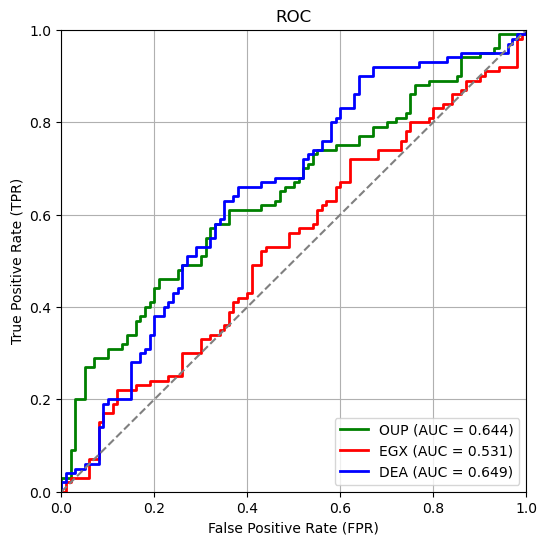

In [29]:
# DEA: Compute ROC curve and AUC
p_dea = np.concatenate((df_dea["p_value"].values, df_dea_BM["p_value"].values))
fpr1, tpr1, _ = roc_curve(~truth, p_dea)
roc_auc1 = auc(fpr1, tpr1)

# EGX: Compute ROC curve and AUC
p_egx = np.concatenate((df_egx["ou2_vs_ou1_pvalue"].iloc[::2].values, df_egx_BM["ou2_vs_ou1_pvalue"].iloc[::2].values))
fpr2, tpr2, _ = roc_curve(~truth, p_egx)
roc_auc2 = auc(fpr2, tpr2)

# EGX: Compute ROC curve and AUC
p_oup = np.concatenate((df_oup["p"].values, df_oup_BM["p"].values))
fpr3, tpr3, _ = roc_curve(~truth, p_oup)
roc_auc3 = auc(fpr3, tpr3)

plt.figure(figsize=(6,6))
plt.plot(fpr3, tpr3, color='green', lw=2, label=f'OUP (AUC = {roc_auc3:.3f})')
plt.plot(fpr2, tpr2, color='red', lw=2, label=f'EGX (AUC = {roc_auc2:.3f})')
plt.plot(fpr1, tpr1, color='blue', lw=2, label=f'DEA (AUC = {roc_auc1:.3f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC')
plt.legend(loc="lower right")
plt.grid()
plt.savefig('ROC_p.png')

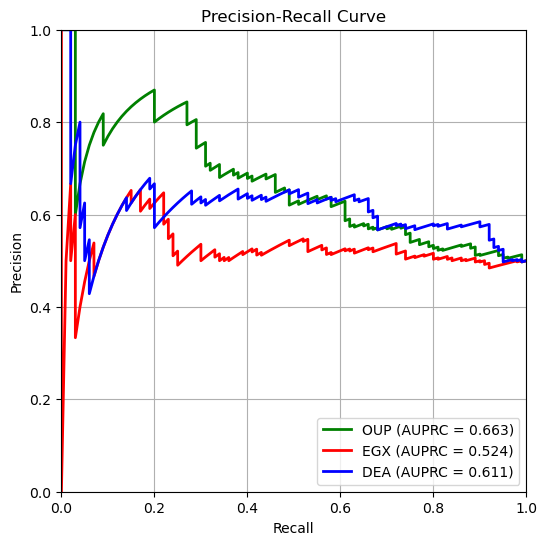

In [30]:
# DEA: Compute Precision-Recall curve and AUC
precision1, recall1, _ = precision_recall_curve(~truth, p_dea)
roc_auc1 = auc(recall1, precision1)

# EGX: Compute Precision-Recall curve and AUC
precision2, recall2, _ = precision_recall_curve(~truth, p_egx)
roc_auc2 = auc(recall2, precision2)

# OUP: Compute Precision-Recall curve and AUC
precision3, recall3, _ = precision_recall_curve(~truth, p_oup)
roc_auc3 = auc(recall3, precision3)

# Plot Precision-Recall curve
plt.figure(figsize=(6, 6))
plt.plot(recall3, precision3, color='green', lw=2, label=f'OUP (AUPRC = {roc_auc3:.3f})')
plt.plot(recall2, precision2, color='red', lw=2, label=f'EGX (AUPRC = {roc_auc2:.3f})')
plt.plot(recall1, precision1, color='blue', lw=2, label=f'DEA (AUPRC = {roc_auc1:.3f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower right")
plt.grid()
plt.savefig('Precision_Recall_p.png')
plt.show()